In [ ]:
!pip install numpy pandas matplotlib


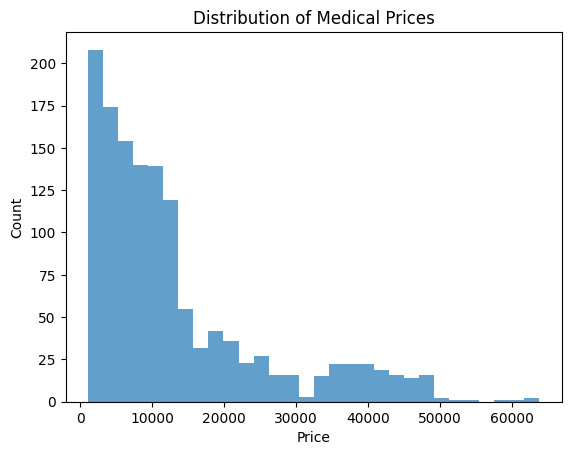

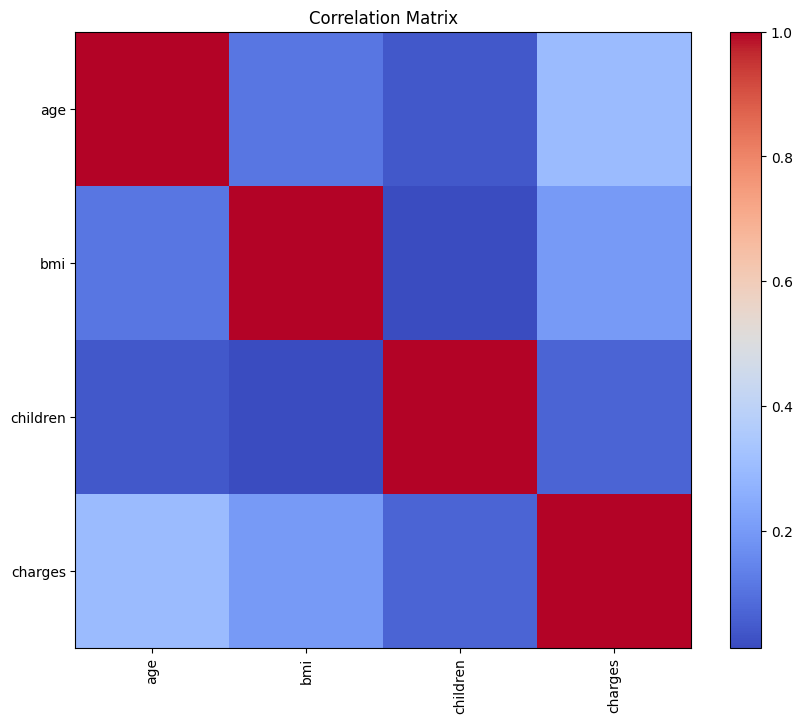

Accuracy: 0.2914798206278027


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def naive_bayes(x_train, y_train):
    # Get the unique classes
    classes = np.unique(y_train)
    
    # Calculate class probabilities
    class_probs = {}
    for cls in classes:
        class_probs[cls] = np.sum(y_train == cls) / len(y_train)
    
    # Calculate feature probabilities for each class
    feature_probs = {}
    for feature_idx in range(x_train.shape[1]):
        feature_probs[feature_idx] = {}
        for cls in classes:
            x_cls = x_train[y_train == cls, feature_idx]
            feature_probs[feature_idx][cls] = {
                'mean': np.mean(x_cls),
                'std': np.std(x_cls)
            }
    
    return class_probs, feature_probs

def label_encode(labels):
    unique_labels = np.unique(labels)
    label_dict = {label: i for i, label in enumerate(unique_labels)}
    encoded_labels = np.array([label_dict[label] for label in labels])
    return encoded_labels

def k_nearest_neighbors(x_train, y_train, x_test, k=3):
    # Calculate distances between test samples and training samples
    distances = np.sqrt(np.sum((x_test[:, np.newaxis] - x_train) ** 2, axis=2))
    
    # Get the indices of the k nearest neighbors
    indices = np.argsort(distances, axis=1)[:, :k]
    
    # Get the labels of the k nearest neighbors
    y_pred = np.take(y_train, indices)
    
    # Count the most frequent label in each row
    y_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=y_pred)
    
    return y_pred

# Load the dataset
data = pd.read_csv('Medical Price Dataset.csv')

# Select only the numeric columns for feature scaling
numeric_columns = data.select_dtypes(include=np.number).columns
x_train = data[numeric_columns].values
y_train = data.iloc[:, -1].values

# Perform feature scaling using min-max normalization
x_train = (x_train - np.min(x_train, axis=0)) / (np.max(x_train, axis=0) - np.min(x_train, axis=0))

# Visualize the distribution of target variable
plt.hist(y_train, bins='auto', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Medical Prices')
plt.show()

# Visualize the correlation matrix
corr_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

# Train the Naive Bayes model
class_probs, feature_probs = naive_bayes(x_train, y_train)

# Label encode the target variable
y_train = label_encode(y_train)

# Train the K-Nearest Neighbors model
k = 3  # Set the number of neighbors
y_pred = k_nearest_neighbors(x_train, y_train, x_train, k)

# Evaluate the accuracy of the K-Nearest Neighbors model
accuracy = np.mean(y_pred == y_train)

# Print the accuracy
print('Accuracy:', accuracy)


